<a href="https://colab.research.google.com/github/ismailerbas/Projects-in-Machine-Learning-and-AI/blob/main/homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Problem


A smoke detector is a device that detects and signals smoke, heat, light or gas, which is a sign of fire. These devices, which are the first step of fire detection, are also the first requirement of life and property safety. Detectors that react to heat and light are mainly used for homes. Those that react to smoke are used in places with heavy crowds [1]. Here we will use the power of the AI to detect smoke by using sets of features and decide if we should set the fire alarm or not.

Setting up Libraries

In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
import os 
import keras 
from keras.models import Sequential, load_model
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

Resources

1) First we need to use dense layer in keras to implement our fully connected 
layers link:https://keras.io/api/layers/core_layers/dense/

2) We define the metrics we use by using model.compile and select the mectrics from here: https://keras.io/api/metrics/

3) We will use the binary cross entropy for loss function becuse our dataset is binary classification problem. The link is here : https://keras.io/api/metrics/probabilistic_metrics/#binarycrossentropy-class

4) We will use Adam optimizer because it generally gives better results, it requires less parameters and the computation time is faster which is a good advantage. link:https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

5) We will use early stopping to overcome the overfitting. https://keras.io/api/callbacks/early_stopping/

6) We will also try dropout layers to overcome the overfitting. https://keras.io/api/layers/regularization_layers/dropout/

7) Lastly we will use regularization to add penalty to the loss function to overcome overfitting. https://keras.io/api/layers/regularizers/

The data


In [3]:
# The dataset is taken from: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset
df = pd.read_csv('/content/drive/My Drive/mlp/smoke.csv')

Exploratory Data Analysis (EDA)

In [4]:
# Here we can see a part of the data 
df.head()


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
# The data shape is
df.shape


(62630, 16)

In [ ]:
# We can see that the data has 16 attributes and over 60k different sensor data. 
# The first column is the index column we don't need it. In addittion UTC is the timestamp and the CNT is the count numbers which are also not necessarry to have.
# Therefore we can remove them from the data.

In [5]:
df=df.drop(columns=['Unnamed: 0','CNT','UTC'])

In [6]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# We dropped the unnecessary columns and we can see that we have 12 features and one fire alarm column which is the class column.

In [4]:
# Next we check if there are NaN values in the data
df.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [ ]:
# We can see that there are no null values, we can get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [ ]:
# Since we just have numerical colums we can get the statistics about the dataset
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [ ]:
# From these results we can see that Raw Ethanol's mean is highest amoung the others with standart deviation of 609. This column shows Raw Ethanol amount in the area.
# whereas temperature column has the least mean with standart deviation of 14. 
# That is because the units are different and temperature is usually between -25C to 100C  so it can not give high mean like the others.
# we can see that TVOC has highest standart deviation of 7812
# The detailed dataset feature names can be found in: https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6

In [ ]:
df.groupby('Fire Alarm').mean()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Fire Alarm,,,,,,,,,,,,
0,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259
1,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627


In [ ]:
# We can check if the data is balanced or not 
df['Fire Alarm'].value_counts(normalize=True) #normalizes the result


1    0.714626
0    0.285374
Name: Fire Alarm, dtype: float64

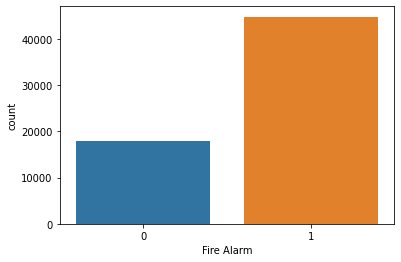

In [ ]:
# We can visualize the inbalanced data by plotting it
ax=sns.countplot(df['Fire Alarm'])

Text(0.5, 1.0, 'Fire Alarm')

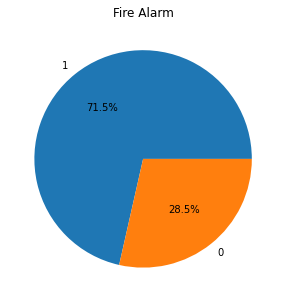

In [ ]:
# Here is the pie chart of the output. 
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df['Fire Alarm'].value_counts(), 
       labels=df['Fire Alarm'].value_counts().index,
       autopct='%1.1f%%')
ax.set_title('Fire Alarm')

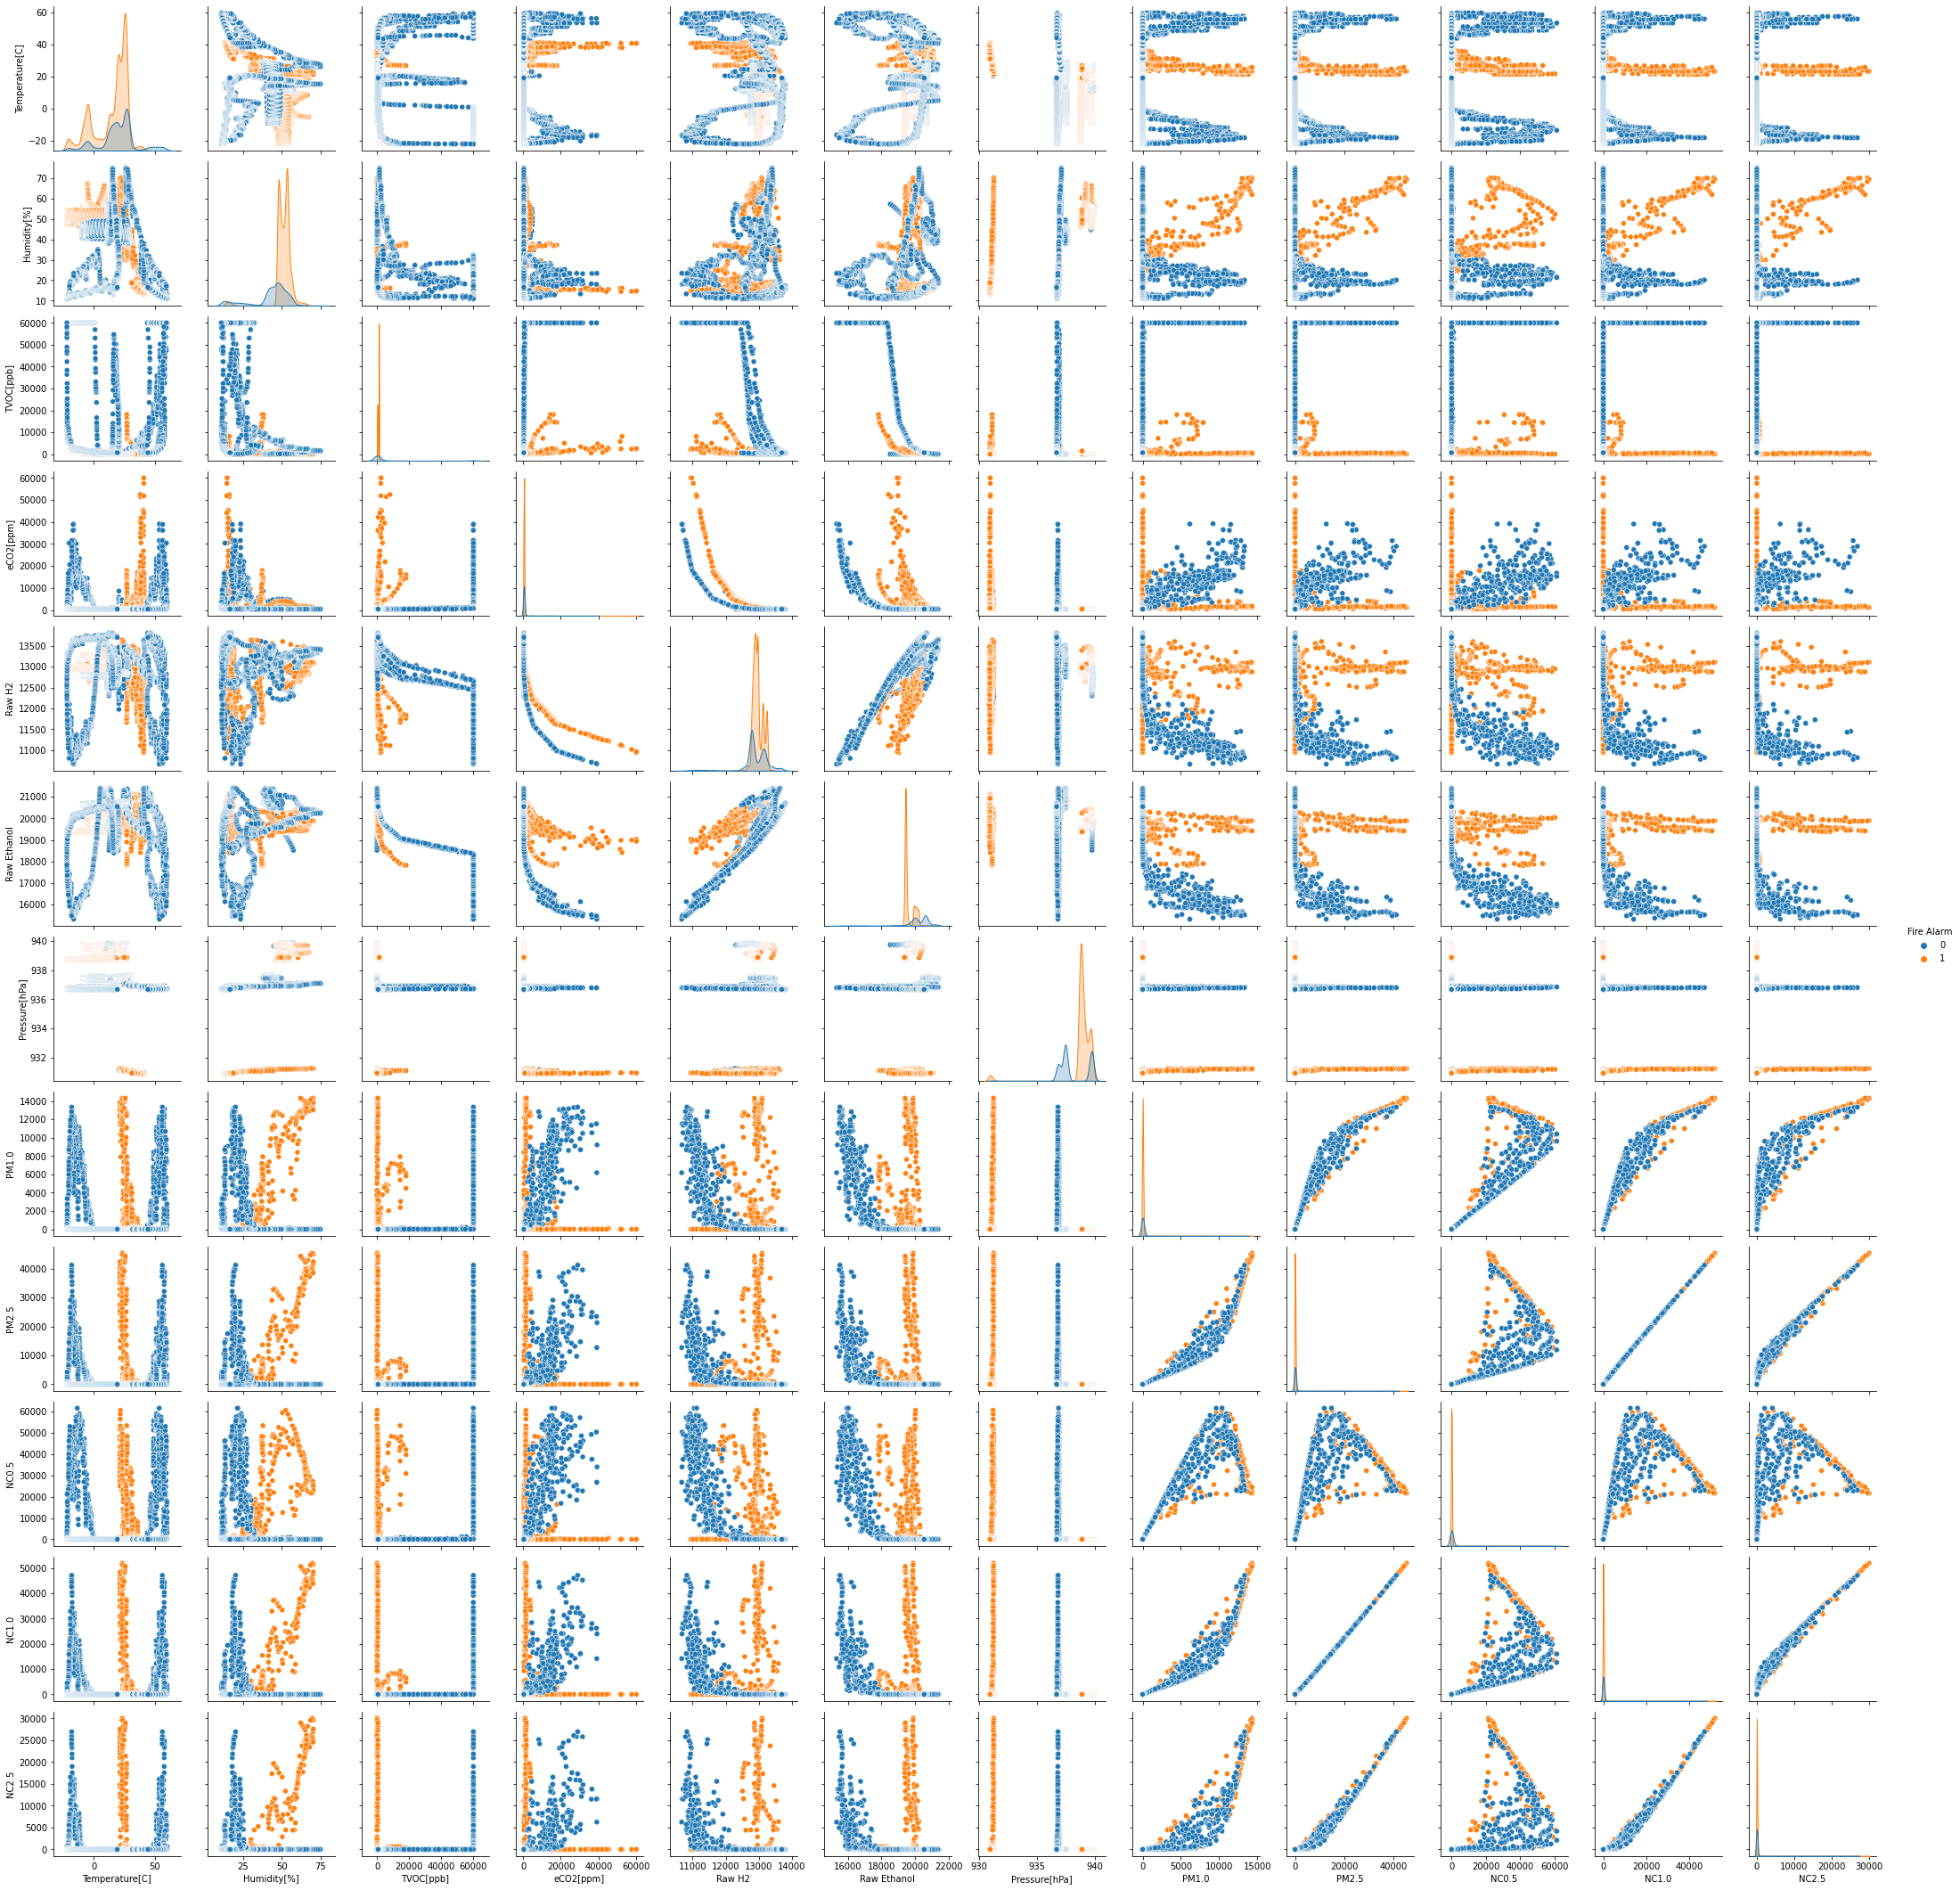

In [7]:
# As we can see that the data is unbalanced and the smoke detection class which is 1, is two times bigger than the no detection class.  
# In this case we can use statify option when we are splitting the dataset and it will not become a huge problem. One advantage of the big dataset is we have more than enough data for generalization.
# We can plot the relationships in the dataset
sns.pairplot(df, hue='Fire Alarm')

938.6276494651127

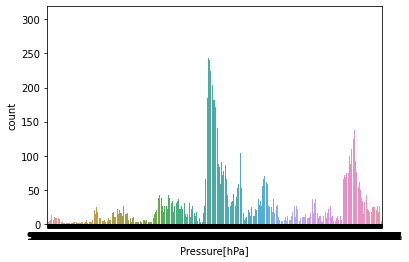

In [ ]:
# We can see countplots of the data features and their data distrubition below
sns.countplot(data=df, x='Pressure[hPa]')
df['Pressure[hPa]'].mean()

19754.257911543988

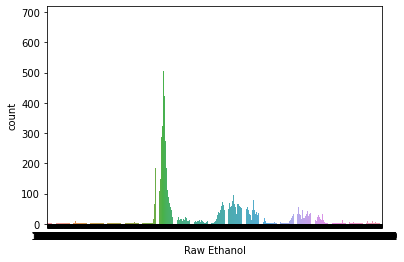

In [ ]:
sns.countplot(data=df, x='Raw Ethanol')
df['Raw Ethanol'].mean()

15.97042358294747

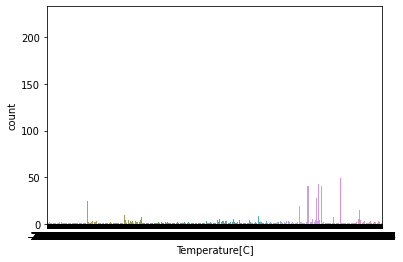

In [ ]:
sns.countplot(data=df, x='Temperature[C]')
df['Temperature[C]'].mean()

Text(0, 0.5, 'Raw H2')

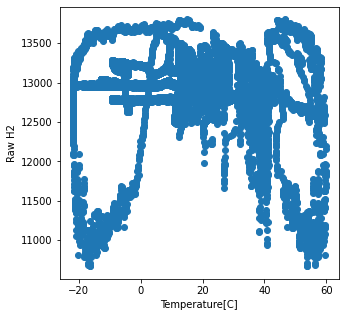

In [ ]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Temperature[C]'], df['Raw H2'])
ax.set_xlabel('Temperature[C]')
ax.set_ylabel('Raw H2')


Text(0, 0.5, 'TVOC[ppb]')

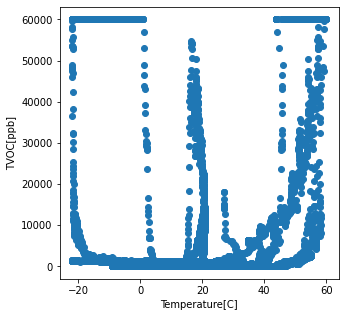

In [ ]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Temperature[C]'], df['TVOC[ppb]'])
ax.set_xlabel('Temperature[C]')
ax.set_ylabel('TVOC[ppb]')


Text(0, 0.5, 'eCO2[ppm]')

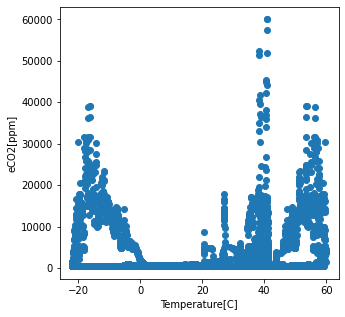

In [ ]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Temperature[C]'], df['eCO2[ppm]'])
ax.set_xlabel('Temperature[C]')
ax.set_ylabel('eCO2[ppm]')


Text(0, 0.5, 'Humidity[%]')

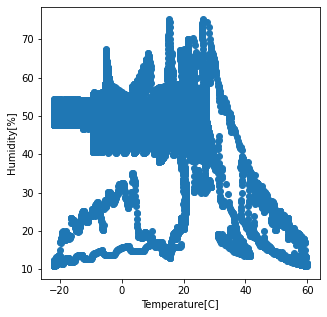

In [ ]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Temperature[C]'], df['Humidity[%]'])
ax.set_xlabel('Temperature[C]')
ax.set_ylabel('Humidity[%]')


Text(0, 0.5, 'Pressure[hPa]')

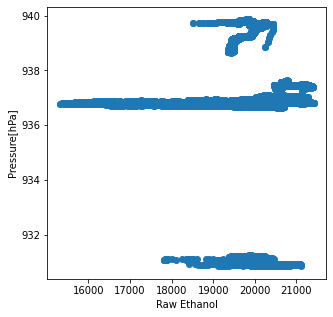

In [ ]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Raw Ethanol'], df['Pressure[hPa]'])
ax.set_xlabel('Raw Ethanol')
ax.set_ylabel('Pressure[hPa]')


Text(0, 0.5, 'Raw H2')

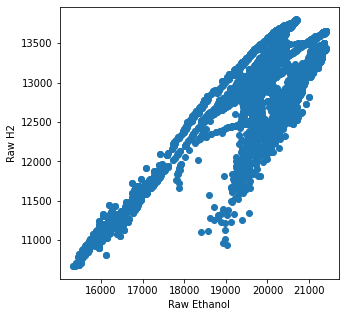

In [ ]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Raw Ethanol'], df['Raw H2'])
ax.set_xlabel('Raw Ethanol')
ax.set_ylabel('Raw H2')


Text(0, 0.5, 'eCO2[ppm]')

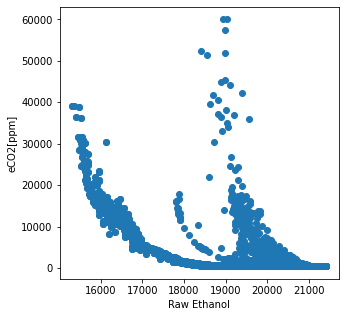

In [ ]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Raw Ethanol'], df['eCO2[ppm]'])
ax.set_xlabel('Raw Ethanol')
ax.set_ylabel('eCO2[ppm]')


Text(0, 0.5, 'TVOC[ppb]')

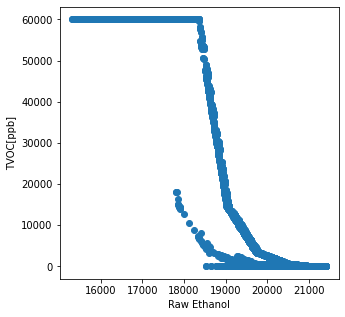

In [ ]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Raw Ethanol'], df['TVOC[ppb]'])
ax.set_xlabel('Raw Ethanol')
ax.set_ylabel('TVOC[ppb]')


Text(0, 0.5, 'NC0.5')

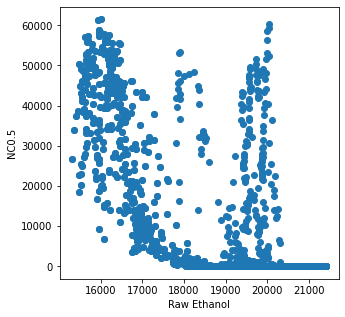

In [ ]:
# we can see correlations between features next
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Raw Ethanol'], df['NC0.5'])
ax.set_xlabel('Raw Ethanol')
ax.set_ylabel('NC0.5')


In [ ]:
# We can see that except between Raw ethanol and raw h2, there are almost no linear correlations between the features. However there could be some other correlations that we can not see by plotting on 2D plane.
# Between Ethanol and H2 values there is some linear correlation in some extent. We can see that increase in H2 results increase in Ethanol values in some values. But there is a huge decrease around 18500 -20000 Ethanol concentration. 

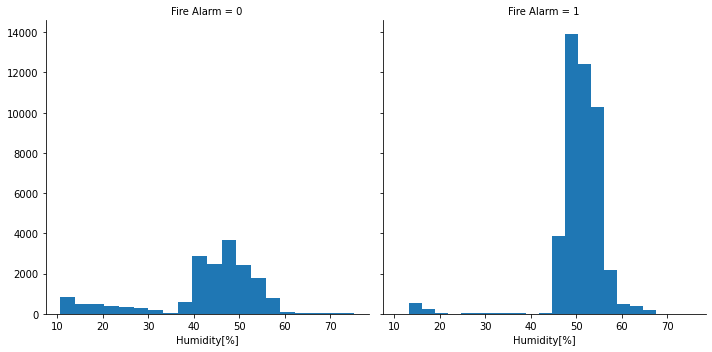

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'Humidity[%]', bins=20)

In [ ]:
# Low humidity values often lies in the no fire alarm class and most of the fire alarm class is around 50% humidity.

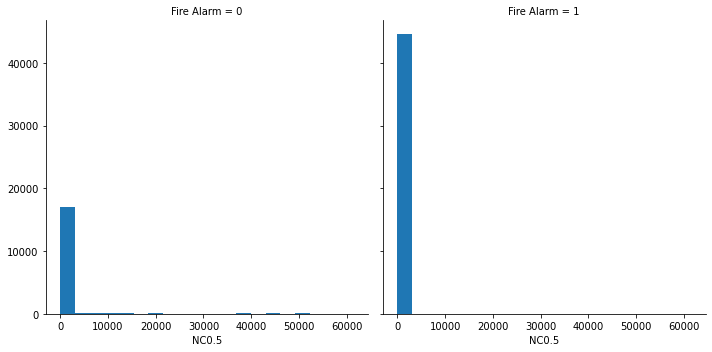

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'NC0.5', bins=20) 

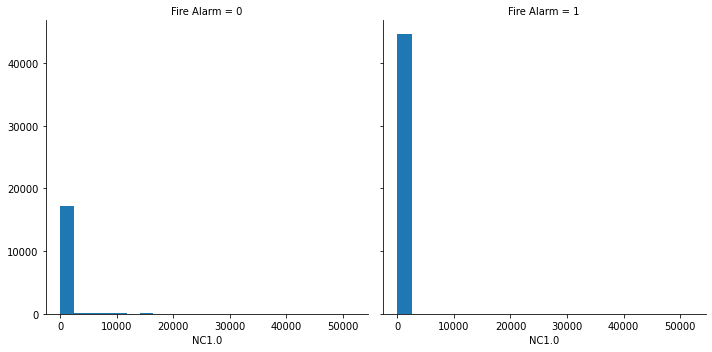

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'NC1.0', bins=20)

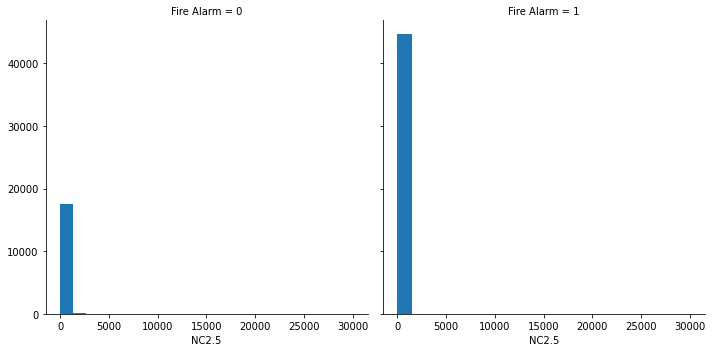

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'NC2.5', bins=20)

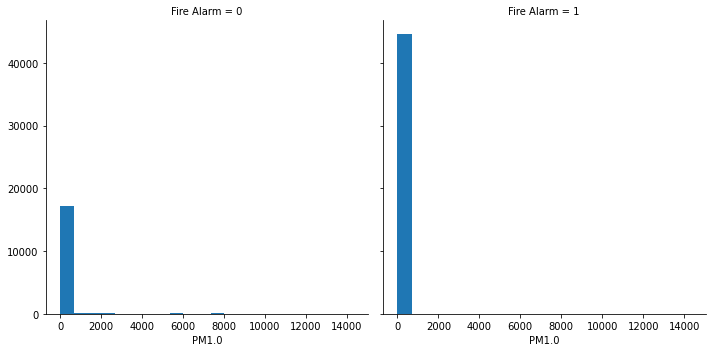

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'PM1.0', bins=20)

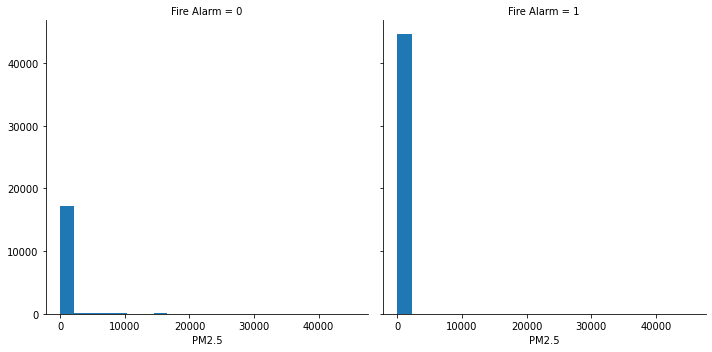

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'PM2.5', bins=20)

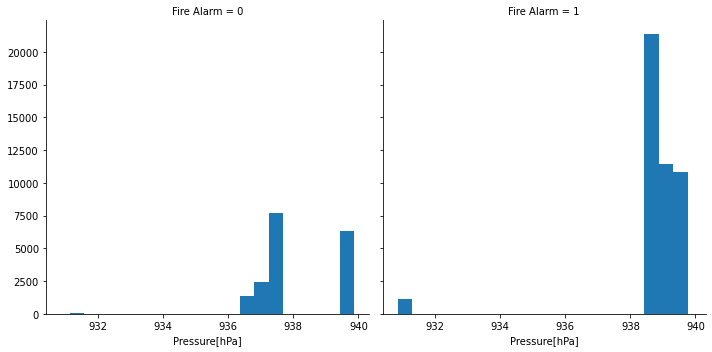

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'Pressure[hPa]', bins=20)

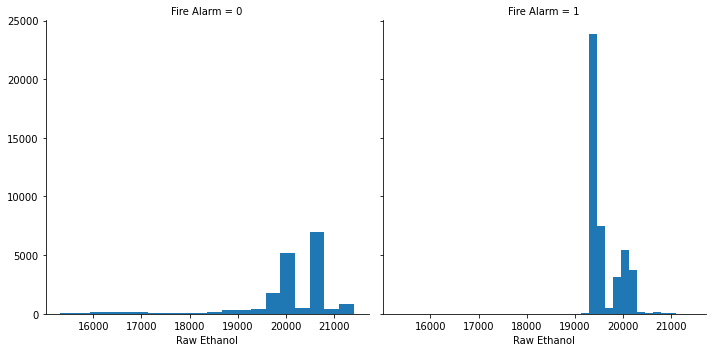

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'Raw Ethanol', bins=20)

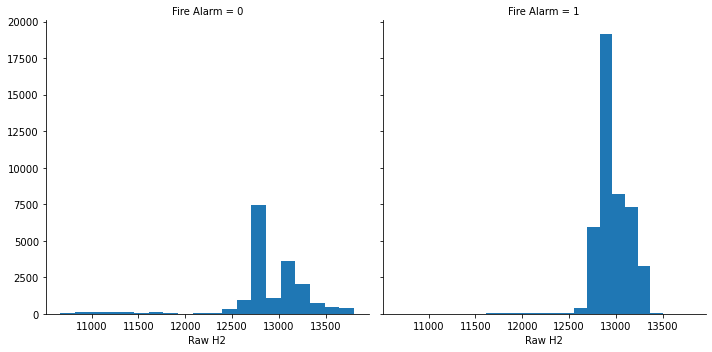

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'Raw H2', bins=20)

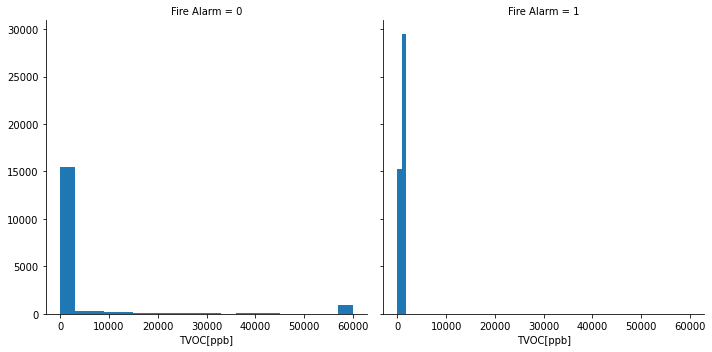

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'TVOC[ppb]', bins=20)

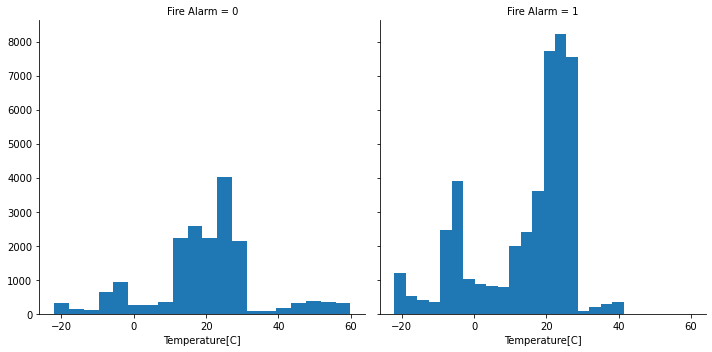

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'Temperature[C]', bins=20)

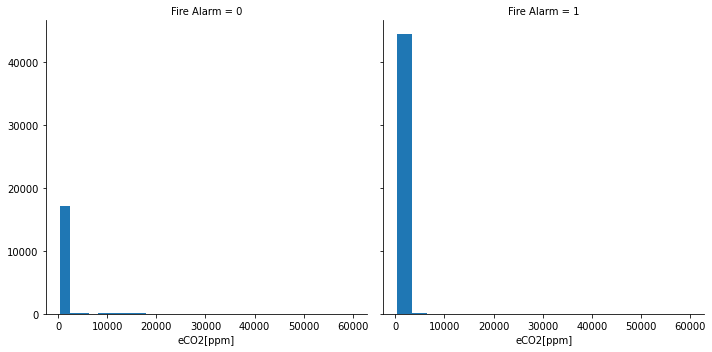

In [ ]:
# we can visualize the distrubition of the data for the features and distrubition of classes
g = sns.FacetGrid(df, col='Fire Alarm', height=5)
g.map(plt.hist, 'eCO2[ppm]', bins=20)

In [ ]:
# From these graphs I can not see any distinct seperation between two classes in terms of that specific feature.

In [ ]:
# Next we get probability of getting fire alarm for each feature
for colmn in df.columns:
  if colmn != "Fire Alarm":
    print(df[[colmn, 'Fire Alarm']].groupby([colmn], as_index=False).mean().sort_values(by='Fire Alarm', ascending=False))

       Temperature[C]  Fire Alarm
10836          11.237         1.0
8482            2.984         1.0
8484            2.995         1.0
8485            2.996         1.0
8486            3.000         1.0
...               ...         ...
4646           -5.914         0.0
4654           -5.899         0.0
4658           -5.893         0.0
4659           -5.892         0.0
21671          59.930         0.0

[21672 rows x 2 columns]
      Humidity[%]  Fire Alarm
1160        30.36         1.0
1333        35.96         1.0
1351        36.65         1.0
3566        61.19         1.0
3565        61.18         1.0
...           ...         ...
1631        40.80         0.0
1633        40.82         0.0
1634        40.83         0.0
1635        40.84         0.0
3889        75.20         0.0

[3890 rows x 2 columns]
      TVOC[ppb]  Fire Alarm
983        1352         1.0
670         749         1.0
626         680         1.0
637         691         1.0
639         693         1.0
...         .

In [ ]:
# Because the data is so big we cannot see the probabilities of each observation to the output class.

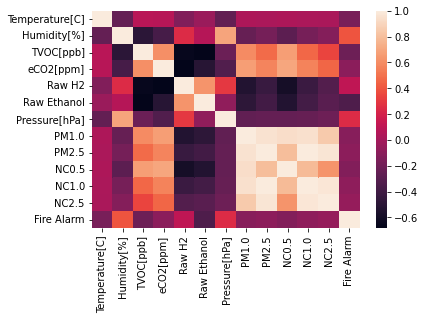

In [ ]:
# Lastly we can check correlation matrix
sns.heatmap(df.corr())

In [ ]:
# We can see some high correlations between PM1.0, PM2.5, NC0.5, NC1.0, NC2.5 

Data partitioning 


In [5]:
# For training data we will drop the last column which is the classification result
X = df.drop(['Fire Alarm'], axis=1)
# We will assign the Fire Alarm to y as our results
Y = df['Fire Alarm']

# Lastly we divide the dataset into train and test we divide them by 80% trainig and 20% testing. 
# In addition we can use stratify to split the dataset with the same proportions of examples in each class.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [6]:
# scale the data between 0 and 1
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

Model training and testing


In [118]:
# First we start with defining a two fully connected layer nn  
model1 = Sequential([
    Dense(64, activation='relu'), # I used relu as activation function on both layers.
    Dense(1, activation='relu'),
])
# I use binary_crossentropy for loss function because this is a binary classification task it is most suitable. To describe the performance of the model we will use the accuracy metric.
model1.compile(loss='binary_crossentropy',
              metrics=['accuracy']),

# Below I save the best model and we can use this model later if we want to.
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [modelCheckPoint]
]

In [119]:
history=model1.fit(X_train, Y_train,
          validation_split=0.2, # We split the training data by 80% train and 20% validation
          batch_size=32, epochs=150, verbose=1, shuffle=True, callbacks=callback) # I choose the batch size 32 for start and we will change it for tuning and find optimal size. 
          # Another hyperparameter is number of epechs which can be optimized with early stopping. Here I defined 150 epochs for a start.
        

Epoch 1/150
1253/1253 [==============================] - 4s 2ms/step - loss: 11.0234 - accuracy: 0.2854 - val_loss: 11.0227 - val_accuracy: 0.2854
Epoch 2/150
1253/1253 [==============================] - 3s 2ms/step - loss: 11.0233 - accuracy: 0.2854 - val_loss: 11.0227 - val_accuracy: 0.2854
Epoch 3/150
1253/1253 [==============================] - 3s 2ms/step - loss: 11.0233 - accuracy: 0.2854 - val_loss: 11.0227 - val_accuracy: 0.2854
Epoch 4/150
1253/1253 [==============================] - 3s 2ms/step - loss: 11.0233 - accuracy: 0.2854 - val_loss: 11.0227 - val_accuracy: 0.2854
Epoch 5/150
1253/1253 [==============================] - 3s 2ms/step - loss: 11.0233 - accuracy: 0.2854 - val_loss: 11.0227 - val_accuracy: 0.2854
Epoch 6/150
1253/1253 [==============================] - 3s 2ms/step - loss: 11.0233 - accuracy: 0.2854 - val_loss: 11.0227 - val_accuracy: 0.2854
Epoch 7/150
1253/1253 [==============================] - 3s 2ms/step - loss: 11.0233 - accuracy: 0.2854 - val_loss: 11

In [120]:
model1.summary() # we can see the model here and we can see the two layers that we defined

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                832       
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [121]:
prediction=model1.predict(X_test)
prediction = np.where( prediction > 0.5, 1, 0 )    

In [122]:
scores = accuracy_score(Y_test, prediction)
print('The accuracy is %.2f' % (scores*100))
precision = precision_score(Y_test, prediction)

print('The  precision is %.2f' % (precision*100))
f1 = f1_score(Y_test, prediction)

print('The  f1 score is %.2f' % (f1*100))
recall= recall_score(Y_test, prediction)

print('The  recall score is %.2f' % (f1*100))

The accuracy is 28.54
The  precision is 0.00
The  f1 score is 0.00
The  recall score is 0.00


In [123]:
# We can see that the model is terrible at this level we get 28% accuracy in the test data and 28 % for the training data. We can see that the model is underfitting, could not learn anything and needs to be optimized. 

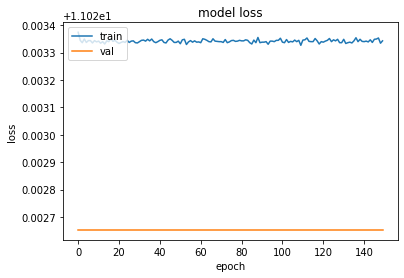

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

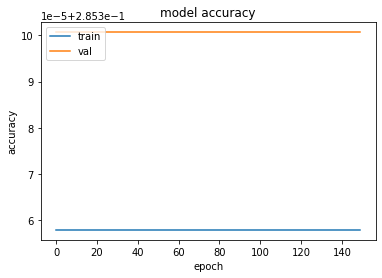

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# we can see that the losses are very high and accuracies are very low. We need to improve the model to increase the accuracy and get good scores.

In [7]:
#Here we introduce the Adam optimizer to the model to increase the learning and we will see the results below.
model = Sequential([
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'), # for the output layer I changed the activation function to the sigmoid because with it the model performed better. That is because the output values are between 0 and 1 and sigmoid function fits better for the model output. 
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-5), # learning rate is another parameter that can be tuned to increase the accuracy.
              metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss',  # I added early stopping to the model for preventing overfitting
                              patience = 15,  # The patience value means that the model will stop if the validation loss repeats 15 times.
                              verbose = 0,
                              mode = 'auto')
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [8]:
history=model.fit(X_train, Y_train,
          validation_split=0.2,
          batch_size=32, epochs=1500, verbose=1, shuffle=True, callbacks=callback)   # Because we use early stopping the epochs will stop at best so the epoch number is relatively optimized.

Epoch 1/1500
1253/1253 [==============================] - 4s 2ms/step - loss: 0.6131 - accuracy: 0.7216 - val_loss: 0.6024 - val_accuracy: 0.7222
Epoch 2/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.5968 - accuracy: 0.7228 - val_loss: 0.5911 - val_accuracy: 0.7235
Epoch 3/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.5891 - accuracy: 0.7242 - val_loss: 0.5858 - val_accuracy: 0.7264
Epoch 4/1500
1253/1253 [==============================] - 2s 2ms/step - loss: 0.5857 - accuracy: 0.7262 - val_loss: 0.5833 - val_accuracy: 0.7284
Epoch 5/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.5839 - accuracy: 0.7291 - val_loss: 0.5817 - val_accuracy: 0.7309
Epoch 6/1500
1253/1253 [==============================] - 4s 3ms/step - loss: 0.5825 - accuracy: 0.7306 - val_loss: 0.5802 - val_accuracy: 0.7326
Epoch 7/1500
1253/1253 [==============================] - 4s 3ms/step - loss: 0.5812 - accuracy: 0.7319 - val_loss: 0.5789 -

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We can see that the optimizer greatly improved accuracy. The reason that I chose the Adam optimizer is, because it generally gives better results, it requires less parameters and the computation time is faster which is a good advantage.
# It took 1500 epochs to train that might be because the learning rate is too low. The training accuracy is over 90%. Below we will see the train and validation loss change during the change of epochs. 

In [10]:
prediction=model.predict(X_test)
prediction = np.where( prediction > 0.5, 1, 0 )    

In [11]:
scores = accuracy_score(Y_test, prediction)
print('The accuracy is %.2f' % (scores*100))
precision = precision_score(Y_test, prediction)

print('The  precision is %.2f' % (precision*100))
f1 = f1_score(Y_test, prediction)

print('The  f1 score is %.2f' % (f1*100))
recall= recall_score(Y_test, prediction)

print('The  recall score is %.2f' % (f1*100))

The accuracy is 94.16
The  precision is 96.83
The  f1 score is 95.87
The  recall score is 95.87


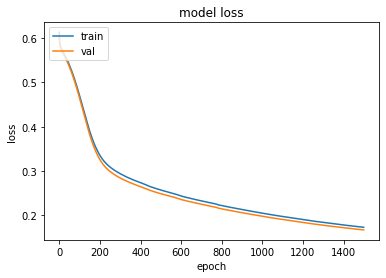

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

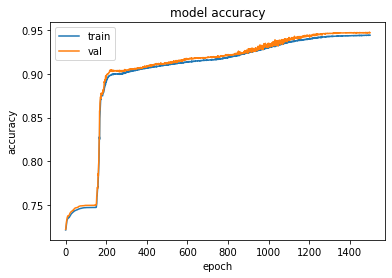

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [128]:
# Here for the first part of hyperparameter tuning we can change the learning rate and see the effect of it  to the learning process and increasşing it, as shown below, will make the training time to be faster and in some cases can get bigger accuracy.
# That is because with very low lr like 1e-5 the  model can get stuck at some point and with big lr value it might loose the optimal point.
model = Sequential([
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3), # learning rate is another parameter that can be tuned to increase the accuracy.
              metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience = 15, 
                              verbose = 0,
                              mode = 'auto')
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [129]:
history=model.fit(X_train, Y_train,
          validation_split=0.2,
          batch_size=32, epochs=1500, verbose=1, shuffle=True, callbacks=callback)

Epoch 1/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.5385 - accuracy: 0.7333 - val_loss: 0.4544 - val_accuracy: 0.7491
Epoch 2/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3873 - accuracy: 0.8054 - val_loss: 0.3295 - val_accuracy: 0.8722
Epoch 3/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3160 - accuracy: 0.8908 - val_loss: 0.2903 - val_accuracy: 0.9051
Epoch 4/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2903 - accuracy: 0.8975 - val_loss: 0.2773 - val_accuracy: 0.8998
Epoch 5/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2739 - accuracy: 0.9038 - val_loss: 0.2599 - val_accuracy: 0.9113
Epoch 6/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9071 - val_loss: 0.2448 - val_accuracy: 0.9153
Epoch 7/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2478 - accuracy: 0.9110 - val_loss: 0.2378 -

In [130]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                832       
                                                                 
 dense_51 (Dense)            (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We can see that training took 552 epochs which is much faster than the lower learnning rate. 
# It converges faster for this data, however it might not give this result for another datasets and this is why hyperparameter tuning is important for the model to be successfull.

In [131]:
prediction=model.predict(X_test)
prediction = np.where( prediction > 0.5, 1, 0 )    

In [132]:
scores = accuracy_score(Y_test, prediction)
print('The accuracy is %.2f' % (scores*100))
precision = precision_score(Y_test, prediction)

print('The  precision is %.2f' % (precision*100))
f1 = f1_score(Y_test, prediction)

print('The  f1 score is %.2f' % (f1*100))
recall= recall_score(Y_test, prediction)

print('The  recall score is %.2f' % (f1*100))

The accuracy is 98.99
The  precision is 99.23
The  f1 score is 99.29
The  recall score is 99.29


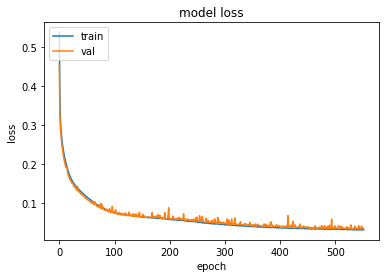

In [133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

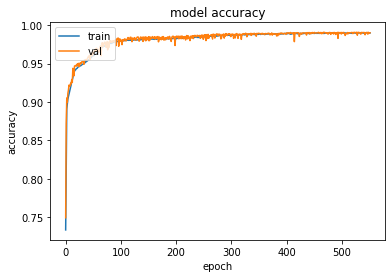

In [134]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# The model got accuracy %99, precision 99%, f1 score 99% and recall score 99% for testing. These are great scores but there is something that needs to be considered: overfitting. From the accuracy and loss graphs, we cannot spot the overfitting (if there was much difference between valiadation and training loss or accuracy we would confidently say the model was overfitting but this is not the case with this results). 
# Anyway we can use some techniques to make our model robust and avoid the overfitting. One of them is using dropout layer. 
# Below we will see the effect of dropout layer to the model and improve our models  generalization. Which is very important for us to use the model in real life situations with confidence. We do not want the machine call fire department where there is no fire or vice versa. 

In [135]:
# Here we use dropout layer to overcome the overfitting and help for regularization.
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience = 15, 
                              verbose = 0,
                              mode = 'auto')
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [136]:
history=model.fit(X_train, Y_train,
          validation_split=0.2,
          batch_size=32, epochs=1500, verbose=1, shuffle=True, callbacks=callback)

Epoch 1/1500
1253/1253 [==============================] - 4s 2ms/step - loss: 0.5679 - accuracy: 0.7309 - val_loss: 0.5119 - val_accuracy: 0.7490
Epoch 2/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.4718 - accuracy: 0.7636 - val_loss: 0.4012 - val_accuracy: 0.7501
Epoch 3/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.4120 - accuracy: 0.7907 - val_loss: 0.3562 - val_accuracy: 0.8047
Epoch 4/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3829 - accuracy: 0.8092 - val_loss: 0.3333 - val_accuracy: 0.8691
Epoch 5/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3672 - accuracy: 0.8195 - val_loss: 0.3203 - val_accuracy: 0.8962
Epoch 6/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3415 - accuracy: 0.8402 - val_loss: 0.2998 - val_accuracy: 0.8882
Epoch 7/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3242 - accuracy: 0.8547 - val_loss: 0.2826 -

In [137]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 64)                832       
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_53 (Dense)            (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [138]:
prediction=model.predict(X_test)
prediction = np.where( prediction > 0.5, 1, 0 )    

In [139]:
scores = accuracy_score(Y_test, prediction)
print('The accuracy is %.2f' % (scores*100))
precision = precision_score(Y_test, prediction)

print('The  precision is %.2f' % (precision*100))
f1 = f1_score(Y_test, prediction)

print('The  f1 score is %.2f' % (f1*100))
recall= recall_score(Y_test, prediction)

print('The  recall score is %.2f' % (f1*100))

The accuracy is 96.75
The  precision is 99.05
The  f1 score is 97.70
The  recall score is 97.70


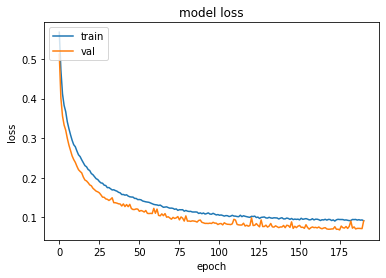

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

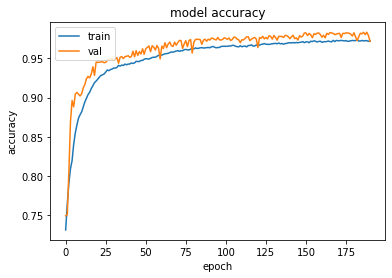

In [141]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# We can see with one dropout layer the accuracy gets to the 97%, precision is 99%, f1 to the 98% and recall to the 98%. It is perfectly fine that they were slightly dropped because we can be more confident about the overfitting problem with this setup. 
# However we can try some other techniques to further improve our model and help the generalization.

In [149]:
# Before we try something else for the generalization and overfitting I would like to show the effect of the patience value. So here the patience is decreased to the 5 and all other parameters are same. 
# So we will see the effect below.
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience = 5, 
                              verbose = 0,
                              mode = 'auto')
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [150]:
history=model.fit(X_train, Y_train,
          validation_split=0.2,
          batch_size=32, epochs=1500, verbose=1, shuffle=True, callbacks=callback)

Epoch 1/1500
1253/1253 [==============================] - 4s 2ms/step - loss: 0.5687 - accuracy: 0.7310 - val_loss: 0.5122 - val_accuracy: 0.7491
Epoch 2/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.4791 - accuracy: 0.7612 - val_loss: 0.4141 - val_accuracy: 0.7504
Epoch 3/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.4174 - accuracy: 0.7911 - val_loss: 0.3562 - val_accuracy: 0.7962
Epoch 4/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3836 - accuracy: 0.8069 - val_loss: 0.3323 - val_accuracy: 0.8860
Epoch 5/1500
1253/1253 [==============================] - 3s 3ms/step - loss: 0.3651 - accuracy: 0.8229 - val_loss: 0.3213 - val_accuracy: 0.8776
Epoch 6/1500
1253/1253 [==============================] - 4s 3ms/step - loss: 0.3398 - accuracy: 0.8441 - val_loss: 0.2939 - val_accuracy: 0.8981
Epoch 7/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3222 - accuracy: 0.8573 - val_loss: 0.2781 -

In [151]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                832       
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [152]:
prediction=model.predict(X_test)
prediction = np.where( prediction > 0.5, 1, 0 )    

In [153]:
scores = accuracy_score(Y_test, prediction)
print('The accuracy is %.2f' % (scores*100))
precision = precision_score(Y_test, prediction)

print('The  precision is %.2f' % (precision*100))
f1 = f1_score(Y_test, prediction)

print('The  f1 score is %.2f' % (f1*100))
recall= recall_score(Y_test, prediction)

print('The  recall score is %.2f' % (f1*100))

The accuracy is 97.40
The  precision is 96.81
The  f1 score is 98.21
The  recall score is 98.21


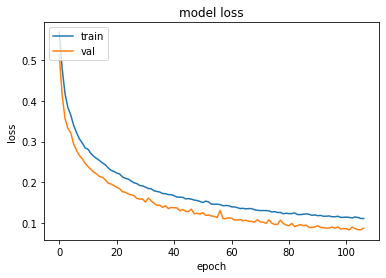

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

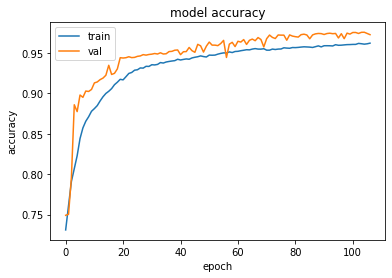

In [155]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# We can see that with patience 5 the model stopped training earlier and could not learn as much as the one that has patience level 15. 
# This is an example of the importance of the tuning. If the tuning is good our model is good. 

In [ ]:
# Here I introduce the model another way to avoid overfitting  problem which is regularization. With regularization we add penalty term to the loss function and prevent the model to learn unnecessary details.
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(1, activation='sigmoid', kernel_regularizer='l2'),
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience = 15, 
                              verbose = 0,
                              mode = 'auto')
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [ ]:
history=model.fit(X_train, Y_train,
          validation_split=0.2,
          batch_size=32, epochs=1500, verbose=1, shuffle=True, callbacks=callback)

Epoch 1/1500
1253/1253 [==============================] - 4s 2ms/step - loss: 0.6268 - accuracy: 0.7141 - val_loss: 0.5998 - val_accuracy: 0.7146
Epoch 2/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.6013 - accuracy: 0.7146 - val_loss: 0.5986 - val_accuracy: 0.7146
Epoch 3/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.6005 - accuracy: 0.7146 - val_loss: 0.5983 - val_accuracy: 0.7146
Epoch 4/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.5997 - accuracy: 0.7146 - val_loss: 0.5983 - val_accuracy: 0.7146
Epoch 5/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.5995 - accuracy: 0.7146 - val_loss: 0.5981 - val_accuracy: 0.7146
Epoch 6/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.5991 - accuracy: 0.7146 - val_loss: 0.5991 - val_accuracy: 0.7146
Epoch 7/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.5987 - accuracy: 0.7146 - val_loss: 0.5981 -

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 64)                832       
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_55 (Dense)            (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
prediction=model.predict(X_test)
prediction = np.where( prediction > 0.5, 1, 0 )    

In [ ]:
scores = accuracy_score(Y_test, prediction)
print('The accuracy is %.2f' % (scores*100))
precision = precision_score(Y_test, prediction)

print('The  precision is %.2f' % (precision*100))
f1 = f1_score(Y_test, prediction)

print('The  f1 score is %.2f' % (f1*100))
recall= recall_score(Y_test, prediction)

print('The  recall score is %.2f' % (f1*100))

The accuracy is 71.46
The  precision is 71.46
The  f1 score is 83.35
The  recall score is 83.35


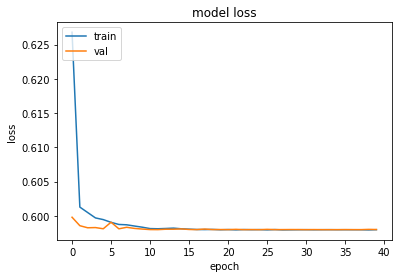

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

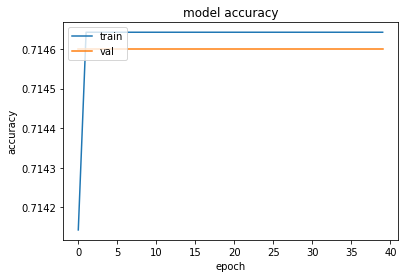

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# We can see that with l2 regularization the model's accuracy and other metrics decreased significantly. That might be because the penalty coefficient is too high for our model and we are punishing too much.
# This can be fixed by adjusting the l2 parameters.

In [156]:
# Here we will increase the layer numbers of the model and we will see the effect on the results.
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience = 15, 
                              verbose = 0,
                              mode = 'auto')
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [157]:
history=model.fit(X_train, Y_train,
          validation_split=0.2,
          batch_size=32, epochs=1500, verbose=1, shuffle=True, callbacks=callback)

Epoch 1/1500
1253/1253 [==============================] - 5s 4ms/step - loss: 0.5246 - accuracy: 0.7492 - val_loss: 0.2875 - val_accuracy: 0.9198
Epoch 2/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.3200 - accuracy: 0.8677 - val_loss: 0.2047 - val_accuracy: 0.9266
Epoch 3/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.8911 - val_loss: 0.1885 - val_accuracy: 0.9402
Epoch 4/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2745 - accuracy: 0.8974 - val_loss: 0.1886 - val_accuracy: 0.9238
Epoch 5/1500
1253/1253 [==============================] - 3s 3ms/step - loss: 0.2604 - accuracy: 0.9001 - val_loss: 0.1669 - val_accuracy: 0.9468
Epoch 6/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9052 - val_loss: 0.1693 - val_accuracy: 0.9457
Epoch 7/1500
1253/1253 [==============================] - 3s 2ms/step - loss: 0.2392 - accuracy: 0.9100 - val_loss: 0.1421 -

In [158]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 64)                832       
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 32)                2080      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_60 (Dense)            (None, 16)                528       
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_61 (Dense)            (None, 1)               

In [159]:
prediction=model.predict(X_test)
prediction = np.where( prediction > 0.5, 1, 0 )    

In [160]:
scores = accuracy_score(Y_test, prediction)
print('The accuracy is %.2f' % (scores*100))
precision = precision_score(Y_test, prediction)

print('The  precision is %.2f' % (precision*100))
f1 = f1_score(Y_test, prediction)

print('The  f1 score is %.2f' % (f1*100))
recall= recall_score(Y_test, prediction)

print('The  recall score is %.2f' % (f1*100))

The accuracy is 94.19
The  precision is 96.75
The  f1 score is 95.90
The  recall score is 95.90


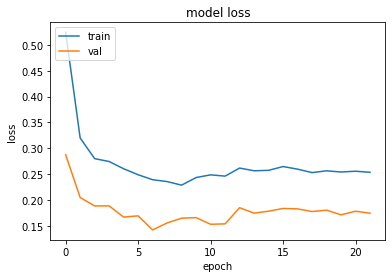

In [161]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

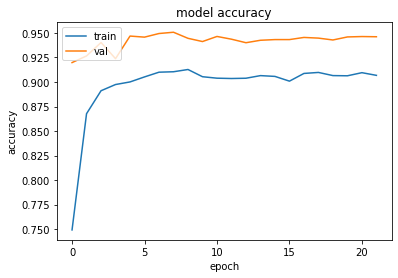

In [162]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# We can see that with more layers our model gave slightly worse results. When we increase the layers the model will look to details that might not be necessary for our classifiction. Which is overfitting. 
# So layer depth is another important factor in learning. 

In [163]:
# Here we will change the batch size and see the effect of it to the model accuracy and training performance
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience = 15, 
                              verbose = 0,
                              mode = 'auto')
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]


In [164]:
history=model.fit(X_train, Y_train,
          validation_split=0.2,
          batch_size=64, epochs=1500, verbose=1, shuffle=True, callbacks=callback)

Epoch 1/1500
627/627 [==============================] - 2s 3ms/step - loss: 0.5960 - accuracy: 0.7229 - val_loss: 0.5198 - val_accuracy: 0.7497
Epoch 2/1500
627/627 [==============================] - 2s 2ms/step - loss: 0.4244 - accuracy: 0.8061 - val_loss: 0.2412 - val_accuracy: 0.9254
Epoch 3/1500
627/627 [==============================] - 2s 3ms/step - loss: 0.3057 - accuracy: 0.8747 - val_loss: 0.1989 - val_accuracy: 0.9375
Epoch 4/1500
627/627 [==============================] - 1s 2ms/step - loss: 0.2725 - accuracy: 0.8916 - val_loss: 0.2211 - val_accuracy: 0.9115
Epoch 5/1500
627/627 [==============================] - 1s 2ms/step - loss: 0.2637 - accuracy: 0.8988 - val_loss: 0.1811 - val_accuracy: 0.9449
Epoch 6/1500
627/627 [==============================] - 2s 3ms/step - loss: 0.2457 - accuracy: 0.9090 - val_loss: 0.1647 - val_accuracy: 0.9439
Epoch 7/1500
627/627 [==============================] - 2s 3ms/step - loss: 0.2387 - accuracy: 0.9103 - val_loss: 0.1551 - val_accuracy:

In [165]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 64)                832       
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 32)                2080      
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_64 (Dense)            (None, 16)                528       
                                                                 
 dropout_27 (Dropout)        (None, 16)                0         
                                                                 
 dense_65 (Dense)            (None, 1)               

In [166]:
prediction=model.predict(X_test)
prediction = np.where( prediction > 0.5, 1, 0 )    

In [167]:
scores = accuracy_score(Y_test, prediction)
print('The accuracy is %.2f' % (scores*100))
precision = precision_score(Y_test, prediction)

print('The  precision is %.2f' % (precision*100))
f1 = f1_score(Y_test, prediction)

print('The  f1 score is %.2f' % (f1*100))
recall= recall_score(Y_test, prediction)

print('The  recall score is %.2f' % (f1*100))

The accuracy is 94.21
The  precision is 95.64
The  f1 score is 95.96
The  recall score is 95.96


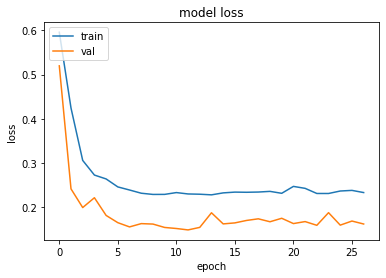

In [168]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

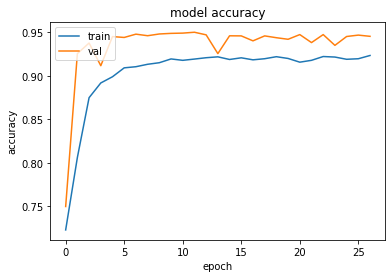

In [169]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# We can see that increasing the batch size decreased our accuracy a little bit. Generally too large batch size hurts the generalization and radient steps are affected with the batch size. 

BASELINE


In [ ]:
# For the baseline model I choose the extra trees classifier. It is an ensemble model so that is good for avoiding overfitting and helping generalization.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, criterion="gini") 
clf.fit(X_train, Y_train)
preds =clf.predict(X_test)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

scores = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='accuracy', error_score='raise')

print('The mean accuracy is %.2f with standard deviation %.2f.' % (np.mean(scores)*100, np.std(scores)))
precision = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='precision', error_score='raise')

print('The mean precision is %.2f with standard deviation %.2f.' % (np.mean(precision)*100, np.std(precision)))
f1 = cross_val_score(clf, X_train,Y_train, cv=cv, scoring='f1', error_score='raise')

print('The mean f1 score is %.2f with standard deviation %.2f.' % (np.mean(f1)*100, np.std(f1)))


The mean accuracy is 99.98 with standard deviation 0.00.
The mean precision is 99.99 with standard deviation 0.00.
The mean f1 score is 99.99 with standard deviation 0.00.


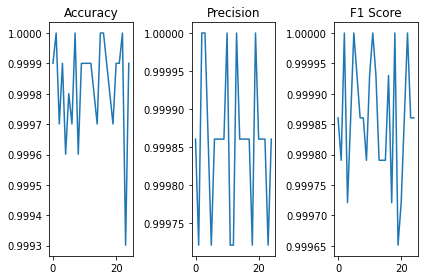

In [ ]:
plt.subplot(1, 3, 1)
plt.plot(scores)
plt.title('Accuracy',fontsize=12)
plt.subplot(1, 3, 2)
plt.plot(precision)
plt.title('Precision',fontsize=12)
plt.subplot(1, 3, 3)
plt.plot(f1)
plt.title('F1 Score',fontsize=12)
plt.tight_layout()

In [ ]:
# We can see that with this dataset the model got almost 100% accuracy, precision and f1 score. It learned the model very well. This model and nn network model almost gave the same results. 
# This might be because the dataset is easily seperable for both models, complexity might be low and the models might weight the features that have most importance for seperating well or models might be finding good correlations.

[1] https://doi.org/10.1542/peds.65.4.718

